In [2]:
#Import the reuired libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the train dataset

train_data = pd.read_csv("train.csv")
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
#importing the test data set
test_data=pd.read_csv("test.csv")

In [5]:
# Shape of data
train_data.shape

(999, 563)

In [6]:
# Check for the null values
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [7]:
train_data.Activity.value_counts()

WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

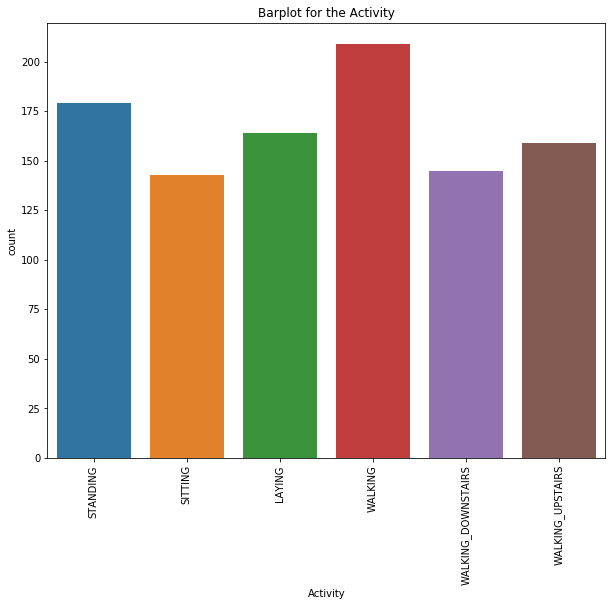

In [8]:
# Checking if there is any imbalance in the data
plt.figure(figsize=(10,8))
plt.title('Barplot for the Activity')
sns.countplot(x = "Activity",  data = train_data )
plt.xticks(rotation = 90)

# Exploratory Data Analysis

### Uni Variate Analysis
Analysis for single variable
For a particular feature how is the data distribution

In [9]:
train_data.describe()

#  Observation:
# 1.The maximum and minimum values are between +1 and -1 resp.
# 2.In most of the variables mean and mode (50%) values are approximately equal which implies that data is normaly distributed.

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.272522,-0.017315,-0.106699,-0.564767,-0.421911,-0.601705,-0.596136,-0.439798,-0.591796,-0.411679,...,-0.219581,-0.541213,0.015125,0.002728,0.004282,-0.013146,-0.545935,0.058899,-0.033470,2.936937
std,0.070183,0.041918,0.056029,0.428018,0.501715,0.340713,0.400180,0.486153,0.351317,0.530312,...,0.351241,0.360838,0.349059,0.469766,0.629273,0.481251,0.471809,0.349956,0.168279,1.636577
min,-0.361205,-0.684097,-1.000000,-0.999300,-0.998359,-0.999454,-0.999407,-0.998077,-0.999808,-0.971348,...,-0.944282,-0.999595,-0.939598,-0.976454,-0.995222,-0.994877,-1.000000,-0.875487,-0.980143,1.000000
25%,0.258468,-0.025925,-0.122726,-0.990822,-0.968894,-0.973927,-0.992207,-0.970928,-0.972885,-0.933391,...,-0.476273,-0.815733,-0.144342,-0.316220,-0.512150,-0.392773,-0.795959,0.030145,-0.103119,1.000000
50%,0.277054,-0.017185,-0.108829,-0.464909,-0.208523,-0.486962,-0.509215,-0.242165,-0.465163,-0.297181,...,-0.264434,-0.629299,0.010903,0.017954,0.012891,-0.016025,-0.717300,0.223164,0.030593,3.000000
75%,0.290635,-0.007523,-0.093717,-0.234604,0.045610,-0.314822,-0.289766,0.012828,-0.302503,-0.008596,...,-0.015262,-0.361251,0.178357,0.332586,0.538985,0.350713,-0.606748,0.281283,0.082679,5.000000
max,0.498177,0.324130,0.346658,0.543347,0.532506,0.364114,0.495926,0.502260,0.554965,0.680338,...,0.989538,0.956845,0.955207,0.998425,0.994519,0.971511,0.799174,0.385117,0.265795,6.000000


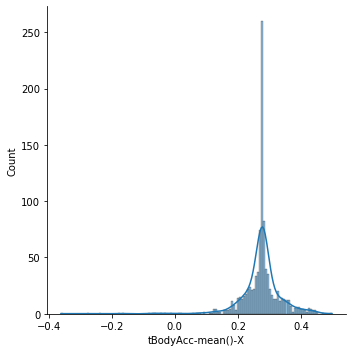

In [10]:
# Distribution of one of the mean variables tBodyAcc-mean()-X
sns.displot(data = train_data, x = "tBodyAcc-mean()-X", kde=True)

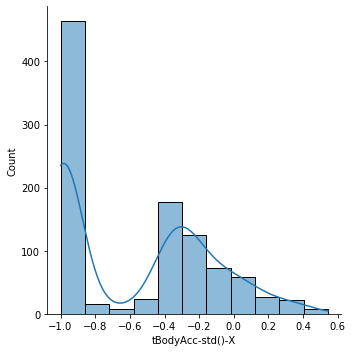

In [11]:
 #distplot of one of the std variable
sns.displot(data = train_data, x = "tBodyAcc-std()-X",kde= True)

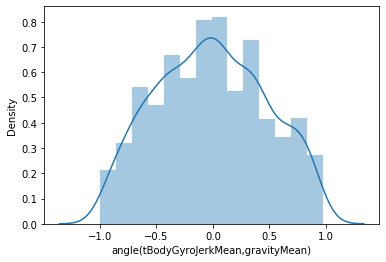

In [12]:
#distplot for one of the gyroscope varaible
sns.distplot(train_data['angle(tBodyGyroJerkMean,gravityMean)'])

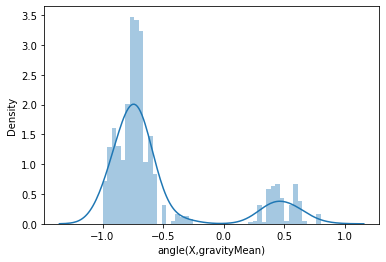

In [13]:
sns.distplot(train_data['angle(X,gravityMean)'])

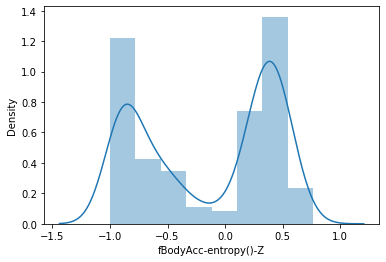

In [14]:
sns.distplot(train_data['fBodyAcc-entropy()-Z'])

### Bi Variate Analysis

Interaction between 2 variable
If the two vairbales can be arranged to get insights into the data

Text(0.1, 9, 'Dynamic')

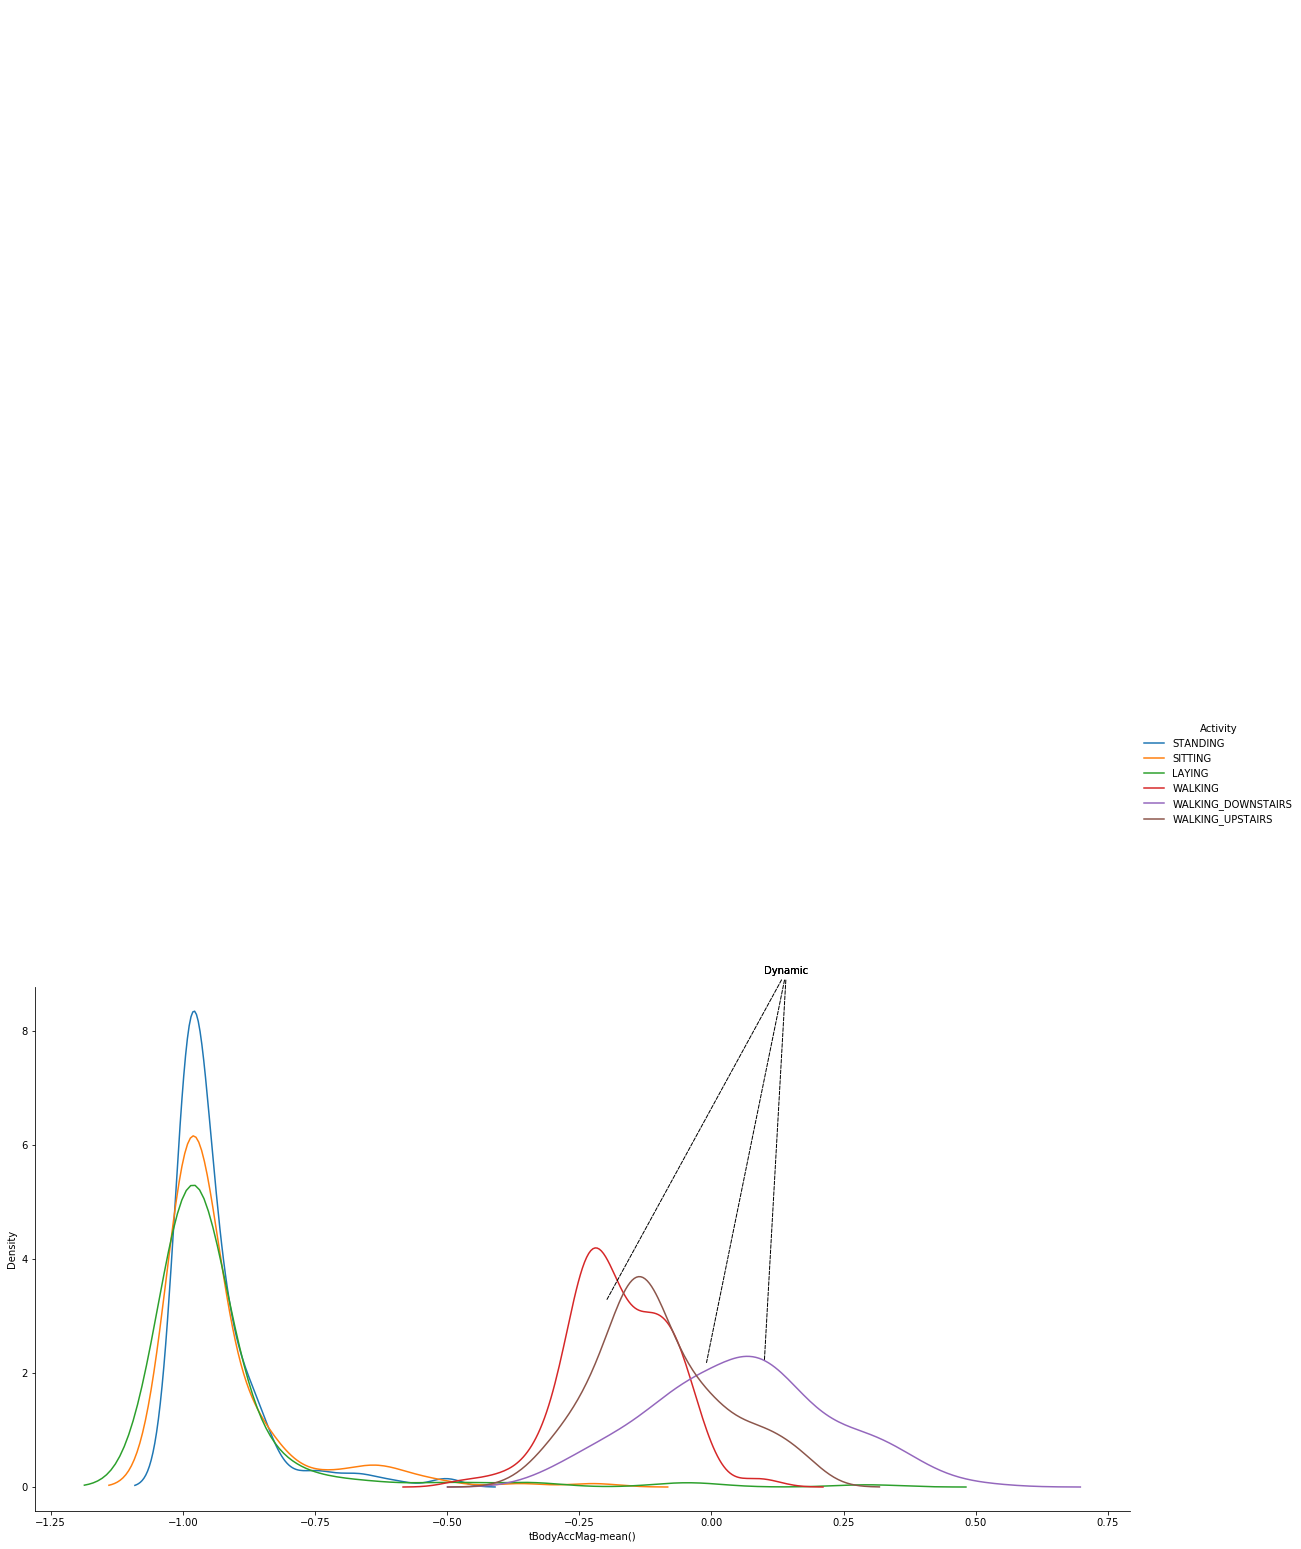

In [15]:
# Plot of acceleration vs different activities

facetgrid = sns.FacetGrid(train_data, hue='Activity', height=8,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

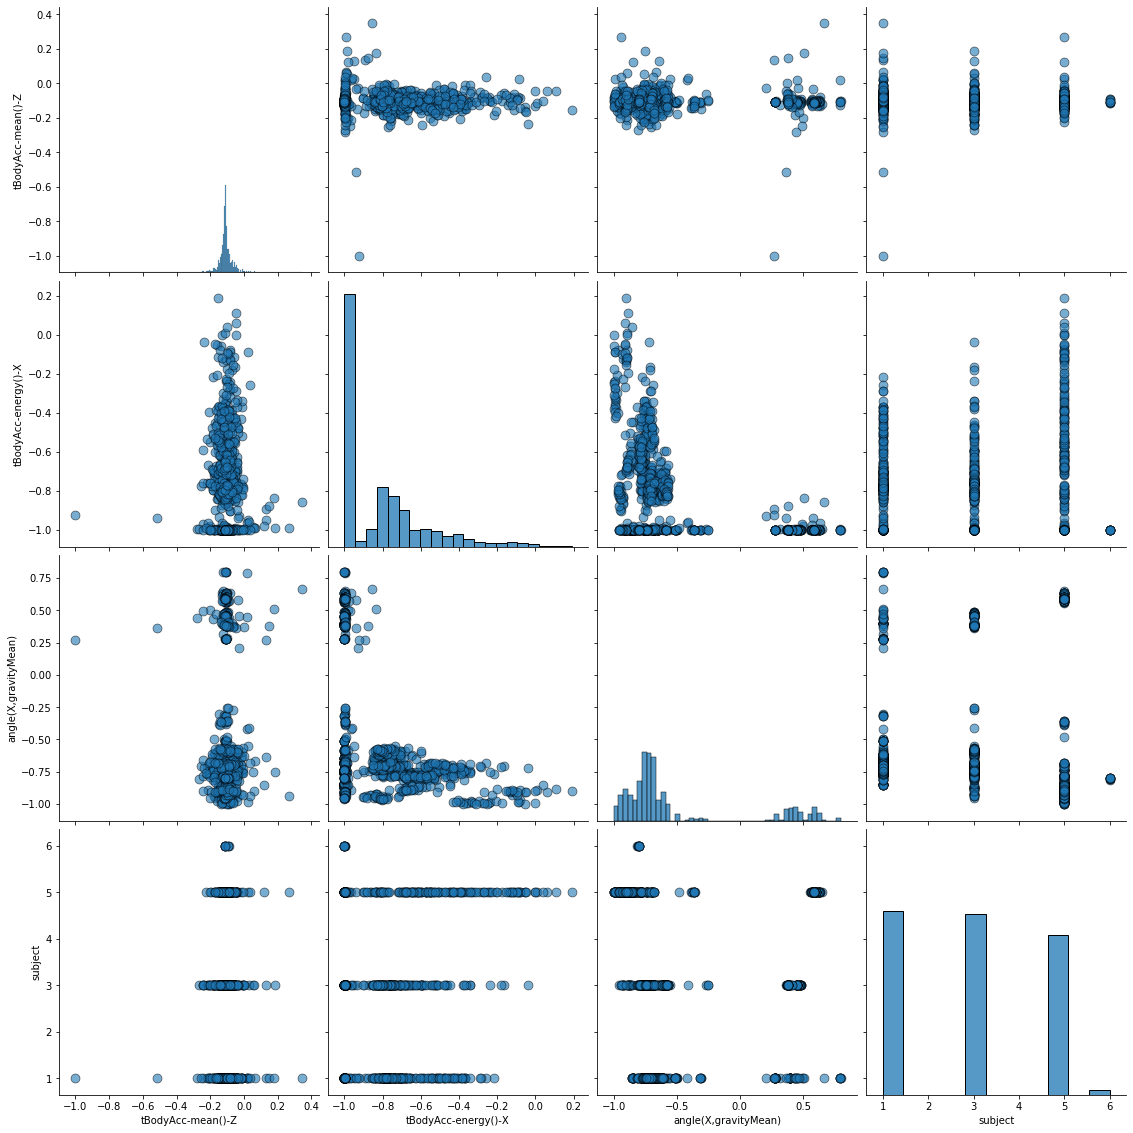

In [16]:
#pairplot of some of the variables along with activity and subject

plot = sns.pairplot(train_data[['tBodyAcc-mean()-Z','tBodyAcc-energy()-X','angle(X,gravityMean)','subject',]],plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

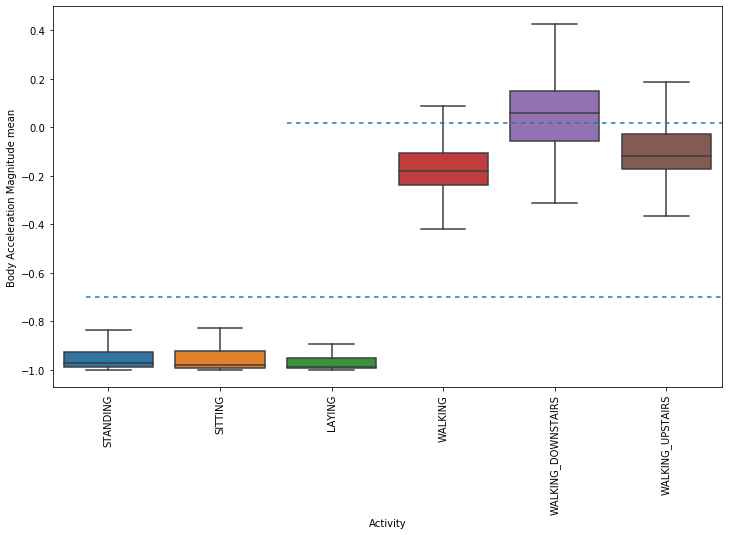

In [17]:
#The insights obtained through density plots can be represented using Box plots.
#Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories

plt.figure(figsize=(12,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

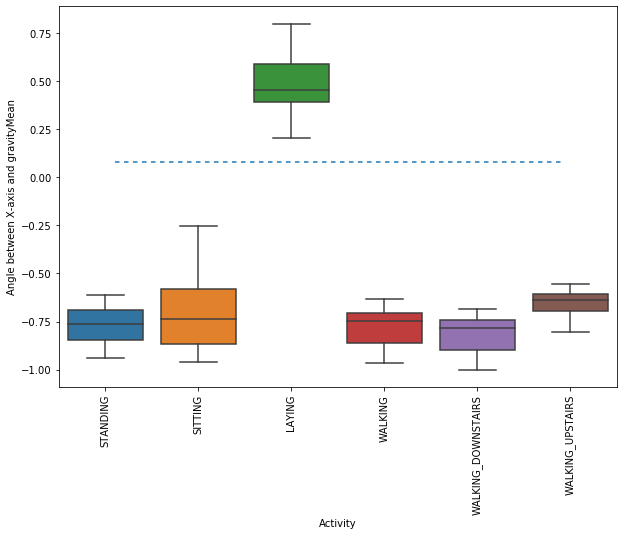

In [18]:
#From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.

plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.xticks(rotation = 90)

### t-SNE Plot
Using t-SNE data can be visualized from extremely high dimensional space to a low dimensional space and still it retains a lot of actual information. Given training data of 563 unique features, using t-SNE it can be visualized in 2D space

In [19]:
from sklearn.manifold import TSNE

In [20]:
X_for_tsne = train_data.drop(['subject','Activity'], axis = 1)

In [21]:
%time
tsne = TSNE(random_state = 42, n_components = 2, verbose =1, perplexity = 0, n_iter =1000).fit_transform(X_for_tsne)

CPU times: total: 0 ns
Wall time: 0 ns
[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 999 samples in 0.000s...
[t-SNE] Computed neighbors for 999 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 999 / 999
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.000000
[t-SNE] KL divergence after 650 iterations: 0.000000


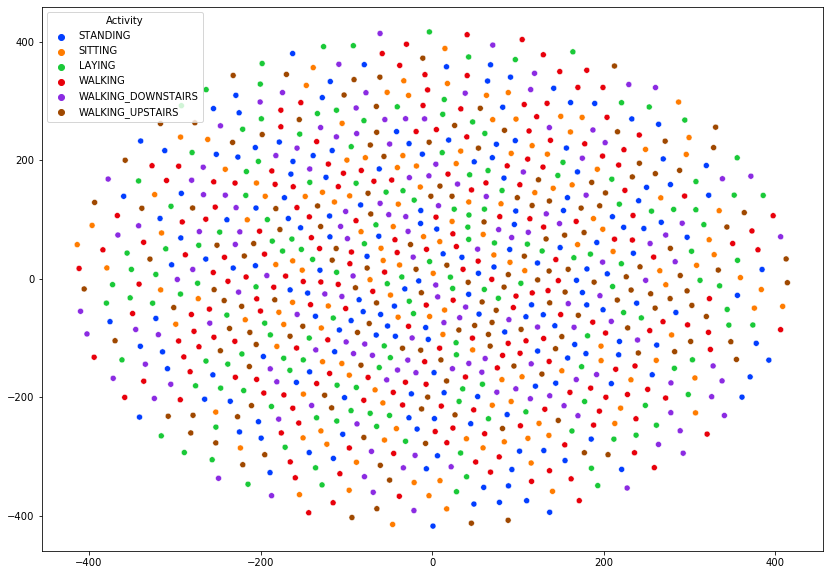

In [22]:
plt.figure(figsize=(14,10))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train_data["Activity"],palette="bright")

**POINT PLOT** : An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes

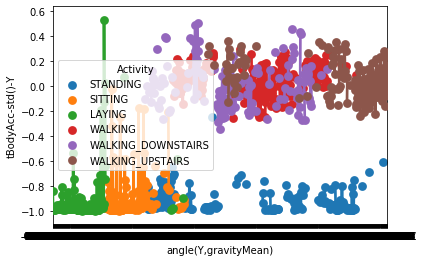

In [23]:
sns.pointplot(train_data['angle(Y,gravityMean)'], train_data['tBodyAcc-std()-Y'], hue=train_data['Activity']);

## Data Preparation

In [24]:
# Converting the Activity variable records from categorical to numerical using a temp variable in both test and train data

# Train data
temp_train = []
for i in train_data.Activity:
    if i == "WALKING" : temp_train.append(0)
    if i == "WALKING_UPSTAIRS": temp_train.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_train.append(2)
    if i == "SITTING": temp_train.append(3)
    if i == "STANDING" : temp_train.append(4)
    if i == "LAYING" : temp_train.append(5)
train_data["n_activity"] = temp_train

# Test data
temp_test = []
for i in test_data.Activity:
    if i == "WALKING" : temp_test.append(0)
    if i == "WALKING_UPSTAIRS": temp_test.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_test.append(2)
    if i == "SITTING": temp_test.append(3)
    if i == "STANDING" : temp_test.append(4)
    if i == "LAYING" : temp_test.append(5)
test_data["n_activity"] = temp_test


In [25]:
# Dropping the activity variable
test_data.drop(["Activity"], axis =1 , inplace=True)
train_data.drop(["Activity"], axis =1, inplace=True )

In [26]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_activity'],
      dtype='object', length=563)

In [27]:
#converting the datsets into X and y independent and dependent variables respectively
X_train = train_data.iloc[:,0:562]

X_test = test_data.iloc[:,0:562]

print(X_train.shape)
#print(X_test.shape)

(999, 562)


In [28]:
y_train=train_data['n_activity']
y_test=test_data['n_activity']

print(y_train.shape)
print(y_test.shape)

(999,)
(999,)


In [29]:
# Using the standard scaler to transform the data such that it has mean as 0 and std as 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)
scaled_train_data

array([[ 0.22897582, -0.07109638, -0.46795393, ...,  0.34605098,
        -0.14956908, -1.18412227],
       [ 0.08405787,  0.02159756, -0.30036879, ...,  0.34704669,
        -0.12394279, -1.18412227],
       [ 0.10165257, -0.05135717, -0.12075621, ...,  0.3480428 ,
        -0.09303278, -1.18412227],
       ...,
       [ 0.07973486, -0.06037878, -0.06692582, ...,  0.43090796,
        -0.21745851,  1.87256546],
       [ 0.03168433,  0.07953187,  0.18311468, ...,  0.43366483,
        -0.21346518,  1.87256546],
       [ 0.05657762,  0.00899166, -0.07558744, ...,  0.43125486,
        -0.22720232,  1.87256546]])

# Reducing the features - PCA
As there are mny number of unique features, to reduce the numbers PCA is one of the methods to reduce the numbers

Text(0, 0.5, 'cumulative explained variance')

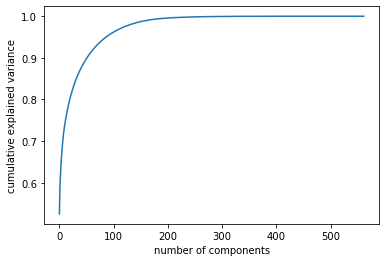

In [30]:
# choosing the number of components 

from sklearn.decomposition import PCA

pca = PCA().fit(scaled_train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [31]:
# Performing PCA to rduce the overfitting 

pca_train = PCA(n_components=200)
pca_train.fit(scaled_train_data)

x_train_pca = pca_train.transform(scaled_train_data)
x_test_pca = pca_train.transform(scaled_test_data)

In [32]:
print("Original Dimension : " ,scaled_train_data.shape)
print("PCA Reduced Dimension : ", x_train_pca.shape )

Original Dimension :  (999, 562)
PCA Reduced Dimension :  (999, 200)


## Models on PCA Dataset

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

### Model 1.Logistic Regression

In [34]:
# Logistic regression

lr = LogisticRegression().fit(x_train_pca, y_train)
prediction_lr = lr.predict(x_test_pca)
accuracy_score(y_test, prediction_lr)
print("Accuracy of Logistic Regression is : {}%".format(accuracy_score(y_test, prediction_lr)*100))

Accuracy of Logistic Regression is : 89.38938938938938%


###  Model 2 : SVM

In [35]:
# Support vector classifier

svm = SVC().fit(x_train_pca, y_train)
prediction_svm = svm.predict(x_test_pca)
accuracy_score(y_test, prediction_svm)
print("Accuracy of SVM is : {}%".format(accuracy_score(y_test, prediction_svm)*100))

Accuracy of SVM is : 87.68768768768768%


### Model 3 : Descision  Tree

In [36]:
dt = DecisionTreeClassifier().fit(x_train_pca, y_train)
prediction_dt = dt.predict(x_test_pca)
accuracy_score(y_test, prediction_dt)
print("Accuracy of Decision Tree is : {}%".format(accuracy_score(y_test, prediction_dt)*100))

Accuracy of Decision Tree is : 68.76876876876878%


### Model 4 : Random Forest

In [37]:
rf = RandomForestClassifier().fit(x_train_pca, y_train)
prediction_rf = rf.predict(x_test_pca)
accuracy_score(y_test, prediction_rf)
print("Accuracy of Random Forest is : {}%".format(accuracy_score(y_test, prediction_rf)*100))

Accuracy of Random Forest is : 79.57957957957959%


### Model 5 : XGBoost

In [38]:
xgb = XGBClassifier(n_jobs = 2)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBoost Accuracy is {}".format(accuracy_score(y_test, y_pred)))

[22:59:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy is 0.8558558558558559


### Model 6 : K Nearest Neighbors

In [39]:
# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

K Nearest Neighbors Classifier accuracy: 76.37637637637637%


### Model 7 : Deep Learning Algorithm : ANN

In [40]:
#rom tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU,PReLU,ELU, Dropout

In [41]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =50 , kernel_initializer = 'he_uniform',activation='relu',input_dim = 562))
# Adding the second hidden layer
classifier.add(Dense(units = 55, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
67/67 [==============================] - 0s 3ms/step - loss: -54.6851 - accuracy: 0.1390 - val_loss: -136.5178 - val_accuracy: 0.2000
Epoch 2/10
67/67 [==============================] - 0s 1ms/step - loss: -277.7994 - accuracy: 0.1390 - val_loss: -470.1631 - val_accuracy: 0.2000
Epoch 3/10
67/67 [==============================] - 0s 886us/step - loss: -740.1346 - accuracy: 0.1390 - val_loss: -1137.6324 - val_accuracy: 0.2000
Epoch 4/10
67/67 [==============================] - 0s 922us/step - loss: -1596.6067 - accuracy: 0.1390 - val_loss: -2135.3865 - val_accuracy: 0.2000
Epoch 5/10
67/67 [==============================] - 0s 975us/step - loss: -2838.8555 - accuracy: 0.1390 - val_loss: -3701.4304 - val_accuracy: 0.2000
Epoch 6/10
67/67 [==============================] - 0s 1ms/step - loss: -4722.2588 - accuracy: 0.1390 - val_loss: -6047.9233 - val_accuracy: 0.2000
Epoch 7/10
67/67 [==============================] - 0s 1ms/step - loss: -7263.2969 - accuracy: 0.1390 - val_loss

### Hyper Parameter tuning - ANN

In [42]:
#Hyper parameter tuning for knowing what exact number of input neurons and output neurons gives max accuracy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units =6 , kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grids = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grids,cv=5)

In [43]:
grid_result=grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

[0.7545025110244751,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (20,)}]

### Hyper Parameter tuning - SVM

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy') # we only care about accuracy here
selector.fit(X_train, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Best parameter set found:
{'C': 100, 'kernel': 'rbf'}
Detailed grid scores:
0.990 (+/-0.017) for {'C': 100, 'kernel': 'linear'}

0.991 (+/-0.019) for {'C': 100, 'kernel': 'rbf'}

0.986 (+/-0.028) for {'C': 100, 'kernel': 'poly'}

0.949 (+/-0.084) for {'C': 100, 'kernel': 'sigmoid'}

0.990 (+/-0.017) for {'C': 50, 'kernel': 'linear'}

0.991 (+/-0.019) for {'C': 50, 'kernel': 'rbf'}

0.986 (+/-0.028) for {'C': 50, 'kernel': 'poly'}

0.955 (+/-0.052) for {'C': 50, 'kernel': 'sigmoid'}

0.990 (+/-0.017) for {'C': 20, 'kernel': 'linear'}

0.991 (+/-0.019) for {'C': 20, 'kernel': 'rbf'}

0.986 (+/-0.028) for {'C': 20, 'kernel': 'poly'}

0.943 (+/-0.056) for {'C': 20, 'kernel': 'sigmoid'}

0.990 (+/-0.017) for {'C': 1, 'kernel': 'linear'}

0.960 (+/-0.052) for {'C': 1, 'kernel': 'rbf'}

0.984 (+/-0.022) for {'C': 1, 'kernel': 'poly'}

0.676 (+/-0.101) for {'C': 1, 'kernel': 'sigmoid'}

0.985 (+/-0.027) for {'C': 0.1, 'kernel': 'linear'}

0.741 (+/-0.045) for {'C': 0.1, 'kernel': 'rbf'}

0.909

### Algorithm Comparison 

In [45]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7), 
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier()
]

In [46]:
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

[23:00:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Score
Model,
DecisionTreeClassifier,0.746747
KNeighborsClassifier,0.764765
SVC,0.840841
LogisticRegression,0.869870
RandomForestClassifier,0.911912
XGBClassifier,0.855856


### More Evaluation Parameters

Text(0.5, 1, 'Confussion Matrix')

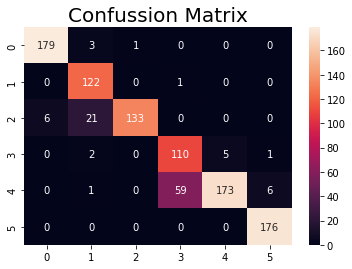

In [47]:
# confussion matrix
cm = confusion_matrix(prediction_lr, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)  

In [48]:
# Clasification Report
cr = classification_report(y_test, prediction_lr)
 
print("Classification report >>> \n", cr)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       185
           1       0.99      0.82      0.90       149
           2       0.83      0.99      0.90       134
           3       0.93      0.65      0.76       170
           4       0.72      0.97      0.83       178
           5       1.00      0.96      0.98       183

    accuracy                           0.89       999
   macro avg       0.91      0.89      0.89       999
weighted avg       0.91      0.89      0.89       999



## data for the API

In [49]:
data = X_test[:1]

In [50]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2


In [51]:
# copy paste the below input in postman

#{"tBodyAcc-mean()-X":0.25717778,"tBodyAcc-mean()-Y":-0.02328523,"tBodyAcc-mean()-Z":-0.014653762,"tBodyAcc-std()-X":-0.938404,"tBodyAcc-std()-Y":-0.92009078,"tBodyAcc-std()-Z":-0.66768331,"tBodyAcc-mad()-X":-0.95250112,"tBodyAcc-mad()-Y":-0.92524867,"tBodyAcc-mad()-Z":-0.67430222,"tBodyAcc-max()-X":-0.89408755,"tBodyAcc-max()-Y":-0.55457721,"tBodyAcc-max()-Z":-0.46622295,"tBodyAcc-min()-X":0.71720847,"tBodyAcc-min()-Y":0.6355024,"tBodyAcc-min()-Z":0.78949666,"tBodyAcc-sma()":-0.87776423,"tBodyAcc-energy()-X":-0.99776606,"tBodyAcc-energy()-Y":-0.99841381,"tBodyAcc-energy()-Z":-0.93434525,"tBodyAcc-iqr()-X":-0.97566897,"tBodyAcc-iqr()-Y":-0.94982365,"tBodyAcc-iqr()-Z":-0.8304778,"tBodyAcc-entropy()-X":-0.16808416,"tBodyAcc-entropy()-Y":-0.37899553,"tBodyAcc-entropy()-Z":0.24621698,"tBodyAcc-arCoeff()-X,1":0.52120364,"tBodyAcc-arCoeff()-X,2":-0.48779311,"tBodyAcc-arCoeff()-X,3":0.48228047,"tBodyAcc-arCoeff()-X,4":-0.045462113,"tBodyAcc-arCoeff()-Y,1":0.21195505,"tBodyAcc-arCoeff()-Y,2":-0.13489443,"tBodyAcc-arCoeff()-Y,3":0.13085848,"tBodyAcc-arCoeff()-Y,4":-0.014176313,"tBodyAcc-arCoeff()-Z,1":-0.10597085,"tBodyAcc-arCoeff()-Z,2":0.073544013,"tBodyAcc-arCoeff()-Z,3":-0.17151642,"tBodyAcc-arCoeff()-Z,4":0.040062978,"tBodyAcc-correlation()-X,Y":0.076988933,"tBodyAcc-correlation()-X,Z":-0.49054573,"tBodyAcc-correlation()-Y,Z":-0.70900265,"tGravityAcc-mean()-X":0.93648925,"tGravityAcc-mean()-Y":-0.28271916,"tGravityAcc-mean()-Z":0.11528825,"tGravityAcc-std()-X":-0.92542727,"tGravityAcc-std()-Y":-0.93701413,"tGravityAcc-std()-Z":-0.56428842,"tGravityAcc-mad()-X":-0.93001992,"tGravityAcc-mad()-Y":-0.93782195,"tGravityAcc-mad()-Z":-0.6055877,"tGravityAcc-max()-X":0.90608259,"tGravityAcc-max()-Y":-0.27924413,"tGravityAcc-max()-Z":0.15289519,"tGravityAcc-min()-X":0.9444614,"tGravityAcc-min()-Y":-0.26215956,"tGravityAcc-min()-Z":-0.076161676,"tGravityAcc-sma()":-0.01782692,"tGravityAcc-energy()-X":0.82929682,"tGravityAcc-energy()-Y":-0.8646206,"tGravityAcc-energy()-Z":-0.96779531,"tGravityAcc-iqr()-X":-0.94972666,"tGravityAcc-iqr()-Y":-0.9461192,"tGravityAcc-iqr()-Z":-0.75971815,"tGravityAcc-entropy()-X":-0.42497535,"tGravityAcc-entropy()-Y":-1.0,"tGravityAcc-entropy()-Z":0.21922731,"tGravityAcc-arCoeff()-X,1":-0.43025357,"tGravityAcc-arCoeff()-X,2":0.43104828,"tGravityAcc-arCoeff()-X,3":-0.43183892,"tGravityAcc-arCoeff()-X,4":0.4327738,"tGravityAcc-arCoeff()-Y,1":-0.79546772,"tGravityAcc-arCoeff()-Y,2":0.78131389,"tGravityAcc-arCoeff()-Y,3":-0.78039147,"tGravityAcc-arCoeff()-Y,4":0.78527158,"tGravityAcc-arCoeff()-Z,1":-0.98441024,"tGravityAcc-arCoeff()-Z,2":0.98717986,"tGravityAcc-arCoeff()-Z,3":-0.98941477,"tGravityAcc-arCoeff()-Z,4":0.98768613,"tGravityAcc-correlation()-X,Y":0.98058028,"tGravityAcc-correlation()-X,Z":-0.99635177,"tGravityAcc-correlation()-Y,Z":-0.96011706,"tBodyAccJerk-mean()-X":0.072046007,"tBodyAccJerk-mean()-Y":0.045754401,"tBodyAccJerk-mean()-Z":-0.10604266,"tBodyAccJerk-std()-X":-0.90668276,"tBodyAccJerk-std()-Y":-0.93801639,"tBodyAccJerk-std()-Z":-0.93593583,"tBodyAccJerk-mad()-X":-0.91608093,"tBodyAccJerk-mad()-Y":-0.93672546,"tBodyAccJerk-mad()-Z":-0.94905379,"tBodyAccJerk-max()-X":-0.90322415,"tBodyAccJerk-max()-Y":-0.94981833,"tBodyAccJerk-max()-Z":-0.89140347,"tBodyAccJerk-min()-X":0.89847935,"tBodyAccJerk-min()-Y":0.95018164,"tBodyAccJerk-min()-Z":0.94615279,"tBodyAccJerk-sma()":-0.93067288,"tBodyAccJerk-energy()-X":-0.99504593,"tBodyAccJerk-energy()-Y":-0.99749551,"tBodyAccJerk-energy()-Z":-0.9970156,"tBodyAccJerk-iqr()-X":-0.936416,"tBodyAccJerk-iqr()-Y":-0.94687413,"tBodyAccJerk-iqr()-Z":-0.96877461,"tBodyAccJerk-entropy()-X":-0.085174151,"tBodyAccJerk-entropy()-Y":-0.31026304,"tBodyAccJerk-entropy()-Z":-0.51028758,"tBodyAccJerk-arCoeff()-X,1":0.52148173,"tBodyAccJerk-arCoeff()-X,2":-0.22588966,"tBodyAccJerk-arCoeff()-X,3":0.49172843,"tBodyAccJerk-arCoeff()-X,4":0.31275555,"tBodyAccJerk-arCoeff()-Y,1":0.2297968,"tBodyAccJerk-arCoeff()-Y,2":0.11395925,"tBodyAccJerk-arCoeff()-Y,3":0.21987861,"tBodyAccJerk-arCoeff()-Y,4":0.42297454,"tBodyAccJerk-arCoeff()-Z,1":-0.082633177,"tBodyAccJerk-arCoeff()-Z,2":0.14042653,"tBodyAccJerk-arCoeff()-Z,3":-0.19623228,"tBodyAccJerk-arCoeff()-Z,4":0.072357939,"tBodyAccJerk-correlation()-X,Y":-0.26486023,"tBodyAccJerk-correlation()-X,Z":0.03585215,"tBodyAccJerk-correlation()-Y,Z":-0.34973525,"tBodyGyro-mean()-X":0.11997616,"tBodyGyro-mean()-Y":-0.091792335,"tBodyGyro-mean()-Z":0.18962854,"tBodyGyro-std()-X":-0.88308911,"tBodyGyro-std()-Y":-0.8161636,"tBodyGyro-std()-Z":-0.94088123,"tBodyGyro-mad()-X":-0.88861231,"tBodyGyro-mad()-Y":-0.85780102,"tBodyGyro-mad()-Z":-0.94581827,"tBodyGyro-max()-X":-0.66341057,"tBodyGyro-max()-Y":-0.71343663,"tBodyGyro-max()-Z":-0.64867861,"tBodyGyro-min()-X":0.83710039,"tBodyGyro-min()-Y":0.82525677,"tBodyGyro-min()-Z":0.81097714,"tBodyGyro-sma()":-0.79649994,"tBodyGyro-energy()-X":-0.97961636,"tBodyGyro-energy()-Y":-0.98290006,"tBodyGyro-energy()-Z":-0.99403684,"tBodyGyro-iqr()-X":-0.88655788,"tBodyGyro-iqr()-Y":-0.90610426,"tBodyGyro-iqr()-Z":-0.95804876,"tBodyGyro-entropy()-X":0.77403279,"tBodyGyro-entropy()-Y":-0.26770588,"tBodyGyro-entropy()-Z":0.45224806,"tBodyGyro-arCoeff()-X,1":-0.078451267,"tBodyGyro-arCoeff()-X,2":-0.012578616,"tBodyGyro-arCoeff()-X,3":0.23598156,"tBodyGyro-arCoeff()-X,4":-0.19904751,"tBodyGyro-arCoeff()-Y,1":0.03391784,"tBodyGyro-arCoeff()-Y,2":-0.080780533,"tBodyGyro-arCoeff()-Y,3":0.0069987153,"tBodyGyro-arCoeff()-Y,4":0.24488551,"tBodyGyro-arCoeff()-Z,1":0.21651661,"tBodyGyro-arCoeff()-Z,2":-0.27968077,"tBodyGyro-arCoeff()-Z,3":0.24973875,"tBodyGyro-arCoeff()-Z,4":0.017719752,"tBodyGyro-correlation()-X,Y":0.64846454,"tBodyGyro-correlation()-X,Z":-0.23693109,"tBodyGyro-correlation()-Y,Z":-0.30173469,"tBodyGyroJerk-mean()-X":-0.20489621,"tBodyGyroJerk-mean()-Y":-0.17448771,"tBodyGyroJerk-mean()-Z":-0.09338934,"tBodyGyroJerk-std()-X":-0.90122415,"tBodyGyroJerk-std()-Y":-0.91086005,"tBodyGyroJerk-std()-Z":-0.93925042,"tBodyGyroJerk-mad()-X":-0.91036271,"tBodyGyroJerk-mad()-Y":-0.92735675,"tBodyGyroJerk-mad()-Z":-0.95355413,"tBodyGyroJerk-max()-X":-0.86791431,"tBodyGyroJerk-max()-Y":-0.91349778,"tBodyGyroJerk-max()-Z":-0.89757791,"tBodyGyroJerk-min()-X":0.90493669,"tBodyGyroJerk-min()-Y":0.91730839,"tBodyGyroJerk-min()-Z":0.9476122,"tBodyGyroJerk-sma()":-0.92960905,"tBodyGyroJerk-energy()-X":-0.99468622,"tBodyGyroJerk-energy()-Y":-0.99579057,"tBodyGyroJerk-energy()-Z":-0.99781265,"tBodyGyroJerk-iqr()-X":-0.93654081,"tBodyGyroJerk-iqr()-Y":-0.95887957,"tBodyGyroJerk-iqr()-Z":-0.97034831,"tBodyGyroJerk-entropy()-X":0.03661912,"tBodyGyroJerk-entropy()-Y":0.076459933,"tBodyGyroJerk-entropy()-Z":-0.19712605,"tBodyGyroJerk-arCoeff()-X,1":0.10651426,"tBodyGyroJerk-arCoeff()-X,2":-0.020811895,"tBodyGyroJerk-arCoeff()-X,3":0.19325784,"tBodyGyroJerk-arCoeff()-X,4":0.30447875,"tBodyGyroJerk-arCoeff()-Y,1":0.11572923,"tBodyGyroJerk-arCoeff()-Y,2":0.0541496,"tBodyGyroJerk-arCoeff()-Y,3":0.068951237,"tBodyGyroJerk-arCoeff()-Y,4":0.1970496,"tBodyGyroJerk-arCoeff()-Z,1":0.30992826,"tBodyGyroJerk-arCoeff()-Z,2":-0.21265711,"tBodyGyroJerk-arCoeff()-Z,3":0.17317814,"tBodyGyroJerk-arCoeff()-Z,4":0.14584454,"tBodyGyroJerk-correlation()-X,Y":0.12400875,"tBodyGyroJerk-correlation()-X,Z":-0.15534634,"tBodyGyroJerk-correlation()-Y,Z":-0.32343727,"tBodyAccMag-mean()":-0.86692938,"tBodyAccMag-std()":-0.70519112,"tBodyAccMag-mad()":-0.74402172,"tBodyAccMag-max()":-0.76079564,"tBodyAccMag-min()":-0.9816487,"tBodyAccMag-sma()":-0.86692938,"tBodyAccMag-energy()":-0.98016578,"tBodyAccMag-iqr()":-0.85947423,"tBodyAccMag-entropy()":0.25510436,"tBodyAccMag-arCoeff()1":0.053779695,"tBodyAccMag-arCoeff()2":-0.20414449,"tBodyAccMag-arCoeff()3":0.61052755,"tBodyAccMag-arCoeff()4":-0.56444932,"tGravityAccMag-mean()":-0.86692938,"tGravityAccMag-std()":-0.70519112,"tGravityAccMag-mad()":-0.74402172,"tGravityAccMag-max()":-0.76079564,"tGravityAccMag-min()":-0.9816487,"tGravityAccMag-sma()":-0.86692938,"tGravityAccMag-energy()":-0.98016578,"tGravityAccMag-iqr()":-0.85947423,"tGravityAccMag-entropy()":0.25510436,"tGravityAccMag-arCoeff()1":0.053779695,"tGravityAccMag-arCoeff()2":-0.20414449,"tGravityAccMag-arCoeff()3":0.61052755,"tGravityAccMag-arCoeff()4":-0.56444932,"tBodyAccJerkMag-mean()":-0.92976655,"tBodyAccJerkMag-std()":-0.89599425,"tBodyAccJerkMag-mad()":-0.90041731,"tBodyAccJerkMag-max()":-0.90300439,"tBodyAccJerkMag-min()":-0.97501109,"tBodyAccJerkMag-sma()":-0.92976655,"tBodyAccJerkMag-energy()":-0.99560772,"tBodyAccJerkMag-iqr()":-0.91412066,"tBodyAccJerkMag-entropy()":-0.12955231,"tBodyAccJerkMag-arCoeff()1":0.23891093,"tBodyAccJerkMag-arCoeff()2":-0.34559715,"tBodyAccJerkMag-arCoeff()3":0.32646236,"tBodyAccJerkMag-arCoeff()4":-0.263048,"tBodyGyroMag-mean()":-0.79554393,"tBodyGyroMag-std()":-0.76207322,"tBodyGyroMag-mad()":-0.78267232,"tBodyGyroMag-max()":-0.71659365,"tBodyGyroMag-min()":-0.76419261,"tBodyGyroMag-sma()":-0.79554393,"tBodyGyroMag-energy()":-0.97415212,"tBodyGyroMag-iqr()":-0.83958101,"tBodyGyroMag-entropy()":0.66756269,"tBodyGyroMag-arCoeff()1":0.035621137,"tBodyGyroMag-arCoeff()2":-0.16189398,"tBodyGyroMag-arCoeff()3":0.15325006,"tBodyGyroMag-arCoeff()4":-0.006759604,"tBodyGyroJerkMag-mean()":-0.92519489,"tBodyGyroJerkMag-std()":-0.89434361,"tBodyGyroJerkMag-mad()":-0.90014668,"tBodyGyroJerkMag-max()":-0.91673708,"tBodyGyroJerkMag-min()":-0.97636665,"tBodyGyroJerkMag-sma()":-0.92519489,"tBodyGyroJerkMag-energy()":-0.99582422,"tBodyGyroJerkMag-iqr()":-0.9118375,"tBodyGyroJerkMag-entropy()":0.33165431,"tBodyGyroJerkMag-arCoeff()1":0.51695316,"tBodyGyroJerkMag-arCoeff()2":-0.513504,"tBodyGyroJerkMag-arCoeff()3":0.041319806,"tBodyGyroJerkMag-arCoeff()4":0.011835012,"fBodyAcc-mean()-X":-0.91850969,"fBodyAcc-mean()-Y":-0.91821319,"fBodyAcc-mean()-Z":-0.78909145,"fBodyAcc-std()-X":-0.94829035,"fBodyAcc-std()-Y":-0.92513687,"fBodyAcc-std()-Z":-0.63631674,"fBodyAcc-mad()-X":-0.93068029,"fBodyAcc-mad()-Y":-0.92443848,"fBodyAcc-mad()-Z":-0.72490255,"fBodyAcc-max()-X":-0.96842407,"fBodyAcc-max()-Y":-0.94013675,"fBodyAcc-max()-Z":-0.59718873,"fBodyAcc-min()-X":-0.96613713,"fBodyAcc-min()-Y":-0.98445054,"fBodyAcc-min()-Z":-0.95208707,"fBodyAcc-sma()":-0.86506318,"fBodyAcc-energy()-X":-0.99784371,"fBodyAcc-energy()-Y":-0.99603625,"fBodyAcc-energy()-Z":-0.94019503,"fBodyAcc-iqr()-X":-0.90484043,"fBodyAcc-iqr()-Y":-0.93381245,"fBodyAcc-iqr()-Z":-0.86938291,"fBodyAcc-entropy()-X":-0.33967327,"fBodyAcc-entropy()-Y":-0.48580324,"fBodyAcc-entropy()-Z":-0.16625765,"fBodyAcc-maxInds-X":-1.0,"fBodyAcc-maxInds-Y":-1.0,"fBodyAcc-maxInds-Z":-1.0,"fBodyAcc-meanFreq()-X":0.011116947,"fBodyAcc-meanFreq()-Y":0.12125069,"fBodyAcc-meanFreq()-Z":-0.52294869,"fBodyAcc-skewness()-X":-0.5719995,"fBodyAcc-kurtosis()-X":-0.89461236,"fBodyAcc-skewness()-Y":-0.33826592,"fBodyAcc-kurtosis()-Y":-0.68679745,"fBodyAcc-skewness()-Z":0.1895525,"fBodyAcc-kurtosis()-Z":-0.11359571,"fBodyAcc-bandsEnergy()-1,8":-0.99850627,"fBodyAcc-bandsEnergy()-9,16":-0.99794262,"fBodyAcc-bandsEnergy()-17,24":-0.99559788,"fBodyAcc-bandsEnergy()-25,32":-0.99503559,"fBodyAcc-bandsEnergy()-33,40":-0.9959769,"fBodyAcc-bandsEnergy()-41,48":-0.99148743,"fBodyAcc-bandsEnergy()-49,56":-0.99213116,"fBodyAcc-bandsEnergy()-57,64":-0.99977512,"fBodyAcc-bandsEnergy()-1,16":-0.99820395,"fBodyAcc-bandsEnergy()-17,32":-0.99474673,"fBodyAcc-bandsEnergy()-33,48":-0.99430903,"fBodyAcc-bandsEnergy()-49,64":-0.99469323,"fBodyAcc-bandsEnergy()-1,24":-0.99802046,"fBodyAcc-bandsEnergy()-25,48":-0.99372747,"fBodyAcc-bandsEnergy()-1,8.1":-0.99620895,"fBodyAcc-bandsEnergy()-9,16.1":-0.99797615,"fBodyAcc-bandsEnergy()-17,24.1":-0.99892091,"fBodyAcc-bandsEnergy()-25,32.1":-0.99640106,"fBodyAcc-bandsEnergy()-33,40.1":-0.99755992,"fBodyAcc-bandsEnergy()-41,48.1":-0.99506803,"fBodyAcc-bandsEnergy()-49,56.1":-0.99735126,"fBodyAcc-bandsEnergy()-57,64.1":-0.99823805,"fBodyAcc-bandsEnergy()-1,16.1":-0.99607053,"fBodyAcc-bandsEnergy()-17,32.1":-0.99792459,"fBodyAcc-bandsEnergy()-33,48.1":-0.99635664,"fBodyAcc-bandsEnergy()-49,64.1":-0.9976398,"fBodyAcc-bandsEnergy()-1,24.1":-0.99622004,"fBodyAcc-bandsEnergy()-25,48.1":-0.99622539,"fBodyAcc-bandsEnergy()-1,8.2":-0.9247055,"fBodyAcc-bandsEnergy()-9,16.2":-0.99409728,"fBodyAcc-bandsEnergy()-17,24.2":-0.99532347,"fBodyAcc-bandsEnergy()-25,32.2":-0.99896944,"fBodyAcc-bandsEnergy()-33,40.2":-0.99790162,"fBodyAcc-bandsEnergy()-41,48.2":-0.99492962,"fBodyAcc-bandsEnergy()-49,56.2":-0.98926072,"fBodyAcc-bandsEnergy()-57,64.2":-0.9800854,"fBodyAcc-bandsEnergy()-1,16.2":-0.93793669,"fBodyAcc-bandsEnergy()-17,32.2":-0.99667757,"fBodyAcc-bandsEnergy()-33,48.2":-0.9970254,"fBodyAcc-bandsEnergy()-49,64.2":-0.98642738,"fBodyAcc-bandsEnergy()-1,24.2":-0.93920079,"fBodyAcc-bandsEnergy()-25,48.2":-0.99843184,"fBodyAccJerk-mean()-X":-0.89963316,"fBodyAccJerk-mean()-Y":-0.937485,"fBodyAccJerk-mean()-Z":-0.9235514,"fBodyAccJerk-std()-X":-0.92442913,"fBodyAccJerk-std()-Y":-0.94321038,"fBodyAccJerk-std()-Z":-0.94789152,"fBodyAccJerk-mad()-X":-0.89661455,"fBodyAccJerk-mad()-Y":-0.93830911,"fBodyAccJerk-mad()-Z":-0.9425757,"fBodyAccJerk-max()-X":-0.94863426,"fBodyAccJerk-max()-Y":-0.95832542,"fBodyAccJerk-max()-Z":-0.95881686,"fBodyAccJerk-min()-X":-0.94388241,"fBodyAccJerk-min()-Y":-0.98730333,"fBodyAccJerk-min()-Z":-0.97846559,"fBodyAccJerk-sma()":-0.90527425,"fBodyAccJerk-energy()-X":-0.99503609,"fBodyAccJerk-energy()-Y":-0.99749931,"fBodyAccJerk-energy()-Z":-0.9970307,"fBodyAccJerk-iqr()-X":-0.88707736,"fBodyAccJerk-iqr()-Y":-0.93581956,"fBodyAccJerk-iqr()-Z":-0.95365327,"fBodyAccJerk-entropy()-X":-0.4706616,"fBodyAccJerk-entropy()-Y":-0.6721718,"fBodyAccJerk-entropy()-Z":-0.59627404,"fBodyAccJerk-maxInds-X":-0.52,"fBodyAccJerk-maxInds-Y":0.08,"fBodyAccJerk-maxInds-Z":0.32,"fBodyAccJerk-meanFreq()-X":0.45100539,"fBodyAccJerk-meanFreq()-Y":0.13716703,"fBodyAccJerk-meanFreq()-Z":-0.18029913,"fBodyAccJerk-skewness()-X":-0.58008614,"fBodyAccJerk-kurtosis()-X":-0.90807003,"fBodyAccJerk-skewness()-Y":-0.62552686,"fBodyAccJerk-kurtosis()-Y":-0.94275716,"fBodyAccJerk-skewness()-Z":-0.66191006,"fBodyAccJerk-kurtosis()-Z":-0.91153211,"fBodyAccJerk-bandsEnergy()-1,8":-0.99901148,"fBodyAccJerk-bandsEnergy()-9,16":-0.99763006,"fBodyAccJerk-bandsEnergy()-17,24":-0.99598477,"fBodyAccJerk-bandsEnergy()-25,32":-0.99470846,"fBodyAccJerk-bandsEnergy()-33,40":-0.99557158,"fBodyAccJerk-bandsEnergy()-41,48":-0.98787651,"fBodyAccJerk-bandsEnergy()-49,56":-0.98644523,"fBodyAccJerk-bandsEnergy()-57,64":-0.99820517,"fBodyAccJerk-bandsEnergy()-1,16":-0.99804041,"fBodyAccJerk-bandsEnergy()-17,32":-0.99449682,"fBodyAccJerk-bandsEnergy()-33,48":-0.99204962,"fBodyAccJerk-bandsEnergy()-49,64":-0.98633303,"fBodyAccJerk-bandsEnergy()-1,24":-0.99689353,"fBodyAccJerk-bandsEnergy()-25,48":-0.99076269,"fBodyAccJerk-bandsEnergy()-1,8.1":-0.99940916,"fBodyAccJerk-bandsEnergy()-9,16.1":-0.99864806,"fBodyAccJerk-bandsEnergy()-17,24.1":-0.99874875,"fBodyAccJerk-bandsEnergy()-25,32.1":-0.99640627,"fBodyAccJerk-bandsEnergy()-33,40.1":-0.99717222,"fBodyAccJerk-bandsEnergy()-41,48.1":-0.9945302,"fBodyAccJerk-bandsEnergy()-49,56.1":-0.99791979,"fBodyAccJerk-bandsEnergy()-57,64.1":-0.9999697,"fBodyAccJerk-bandsEnergy()-1,16.1":-0.99864167,"fBodyAccJerk-bandsEnergy()-17,32.1":-0.9974017,"fBodyAccJerk-bandsEnergy()-33,48.1":-0.99541085,"fBodyAccJerk-bandsEnergy()-49,64.1":-0.9981824,"fBodyAccJerk-bandsEnergy()-1,24.1":-0.99846306,"fBodyAccJerk-bandsEnergy()-25,48.1":-0.99599581,"fBodyAccJerk-bandsEnergy()-1,8.2":-0.99363885,"fBodyAccJerk-bandsEnergy()-9,16.2":-0.9978378,"fBodyAccJerk-bandsEnergy()-17,24.2":-0.99712931,"fBodyAccJerk-bandsEnergy()-25,32.2":-0.9987495,"fBodyAccJerk-bandsEnergy()-33,40.2":-0.99670876,"fBodyAccJerk-bandsEnergy()-41,48.2":-0.99510966,"fBodyAccJerk-bandsEnergy()-49,56.2":-0.99848581,"fBodyAccJerk-bandsEnergy()-57,64.2":-0.99909354,"fBodyAccJerk-bandsEnergy()-1,16.2":-0.99592463,"fBodyAccJerk-bandsEnergy()-17,32.2":-0.99795094,"fBodyAccJerk-bandsEnergy()-33,48.2":-0.9960129,"fBodyAccJerk-bandsEnergy()-49,64.2":-0.99846008,"fBodyAccJerk-bandsEnergy()-1,24.2":-0.99626705,"fBodyAccJerk-bandsEnergy()-25,48.2":-0.99770046,"fBodyGyro-mean()-X":-0.82355788,"fBodyGyro-mean()-Y":-0.80791598,"fBodyGyro-mean()-Z":-0.91791256,"fBodyGyro-std()-X":-0.90326274,"fBodyGyro-std()-Y":-0.822677,"fBodyGyro-std()-Z":-0.95616508,"fBodyGyro-mad()-X":-0.86512704,"fBodyGyro-mad()-Y":-0.83180082,"fBodyGyro-mad()-Z":-0.94105617,"fBodyGyro-max()-X":-0.90479801,"fBodyGyro-max()-Y":-0.87925663,"fBodyGyro-max()-Z":-0.96778849,"fBodyGyro-min()-X":-0.87859934,"fBodyGyro-min()-Y":-0.94832915,"fBodyGyro-min()-Z":-0.91968517,"fBodyGyro-sma()":-0.82847203,"fBodyGyro-energy()-X":-0.99294953,"fBodyGyro-energy()-Y":-0.98266311,"fBodyGyro-energy()-Z":-0.99799327,"fBodyGyro-iqr()-X":-0.8788944,"fBodyGyro-iqr()-Y":-0.83815197,"fBodyGyro-iqr()-Z":-0.92913995,"fBodyGyro-entropy()-X":0.0007581481,"fBodyGyro-entropy()-Y":0.20014368,"fBodyGyro-entropy()-Z":-0.25338416,"fBodyGyro-maxInds-X":-1.0,"fBodyGyro-maxInds-Y":-0.93548387,"fBodyGyro-maxInds-Z":-0.93103448,"fBodyGyro-meanFreq()-X":0.18403457,"fBodyGyro-meanFreq()-Y":-0.059322857,"fBodyGyro-meanFreq()-Z":0.43810716,"fBodyGyro-skewness()-X":-0.39542276,"fBodyGyro-kurtosis()-X":-0.6987616,"fBodyGyro-skewness()-Y":-0.38745724,"fBodyGyro-kurtosis()-Y":-0.78639417,"fBodyGyro-skewness()-Z":-0.48565359,"fBodyGyro-kurtosis()-Z":-0.78681512,"fBodyGyro-bandsEnergy()-1,8":-0.99462908,"fBodyGyro-bandsEnergy()-9,16":-0.99046914,"fBodyGyro-bandsEnergy()-17,24":-0.99277782,"fBodyGyro-bandsEnergy()-25,32":-0.99567969,"fBodyGyro-bandsEnergy()-33,40":-0.98707772,"fBodyGyro-bandsEnergy()-41,48":-0.98665097,"fBodyGyro-bandsEnergy()-49,56":-0.98411445,"fBodyGyro-bandsEnergy()-57,64":-0.98525021,"fBodyGyro-bandsEnergy()-1,16":-0.99355255,"fBodyGyro-bandsEnergy()-17,32":-0.99243025,"fBodyGyro-bandsEnergy()-33,48":-0.98560582,"fBodyGyro-bandsEnergy()-49,64":-0.98461702,"fBodyGyro-bandsEnergy()-1,24":-0.99326921,"fBodyGyro-bandsEnergy()-25,48":-0.99272545,"fBodyGyro-bandsEnergy()-1,8.1":-0.97792782,"fBodyGyro-bandsEnergy()-9,16.1":-0.99485223,"fBodyGyro-bandsEnergy()-17,24.1":-0.99781915,"fBodyGyro-bandsEnergy()-25,32.1":-0.99484295,"fBodyGyro-bandsEnergy()-33,40.1":-0.99240991,"fBodyGyro-bandsEnergy()-41,48.1":-0.98812267,"fBodyGyro-bandsEnergy()-49,56.1":-0.99043323,"fBodyGyro-bandsEnergy()-57,64.1":-0.98796127,"fBodyGyro-bandsEnergy()-1,16.1":-0.98179096,"fBodyGyro-bandsEnergy()-17,32.1":-0.99639919,"fBodyGyro-bandsEnergy()-33,48.1":-0.99145229,"fBodyGyro-bandsEnergy()-49,64.1":-0.98805999,"fBodyGyro-bandsEnergy()-1,24.1":-0.98204835,"fBodyGyro-bandsEnergy()-25,48.1":-0.99337999,"fBodyGyro-bandsEnergy()-1,8.2":-0.99887769,"fBodyGyro-bandsEnergy()-9,16.2":-0.99836665,"fBodyGyro-bandsEnergy()-17,24.2":-0.9984673,"fBodyGyro-bandsEnergy()-25,32.2":-0.99837462,"fBodyGyro-bandsEnergy()-33,40.2":-0.99890591,"fBodyGyro-bandsEnergy()-41,48.2":-0.99589361,"fBodyGyro-bandsEnergy()-49,56.2":-0.99312836,"fBodyGyro-bandsEnergy()-57,64.2":-0.99547231,"fBodyGyro-bandsEnergy()-1,16.2":-0.9983871,"fBodyGyro-bandsEnergy()-17,32.2":-0.9977543,"fBodyGyro-bandsEnergy()-33,48.2":-0.99809593,"fBodyGyro-bandsEnergy()-49,64.2":-0.99414765,"fBodyGyro-bandsEnergy()-1,24.2":-0.99819058,"fBodyGyro-bandsEnergy()-25,48.2":-0.99829005,"fBodyAccMag-mean()":-0.79094643,"fBodyAccMag-std()":-0.711074,"fBodyAccMag-mad()":-0.72670699,"fBodyAccMag-max()":-0.77769715,"fBodyAccMag-min()":-0.94488134,"fBodyAccMag-sma()":-0.79094643,"fBodyAccMag-energy()":-0.95398356,"fBodyAccMag-iqr()":-0.87354261,"fBodyAccMag-entropy()":-0.17459288,"fBodyAccMag-maxInds":-1.0,"fBodyAccMag-meanFreq()":-0.48345254,"fBodyAccMag-skewness()":0.011040681,"fBodyAccMag-kurtosis()":-0.38451662,"fBodyBodyAccJerkMag-mean()":-0.89506118,"fBodyBodyAccJerkMag-std()":-0.89635958,"fBodyBodyAccJerkMag-mad()":-0.8881974,"fBodyBodyAccJerkMag-max()":-0.92846566,"fBodyBodyAccJerkMag-min()":-0.89809981,"fBodyBodyAccJerkMag-sma()":-0.89506118,"fBodyBodyAccJerkMag-energy()":-0.99347143,"fBodyBodyAccJerkMag-iqr()":-0.92147669,"fBodyBodyAccJerkMag-entropy()":-0.48461929,"fBodyBodyAccJerkMag-maxInds":-1.0,"fBodyBodyAccJerkMag-meanFreq()":-0.035355792,"fBodyBodyAccJerkMag-skewness()":-0.2542483,"fBodyBodyAccJerkMag-kurtosis()":-0.70032573,"fBodyBodyGyroMag-mean()":-0.77061,"fBodyBodyGyroMag-std()":-0.79711285,"fBodyBodyGyroMag-mad()":-0.76448457,"fBodyBodyGyroMag-max()":-0.8201876,"fBodyBodyGyroMag-min()":-0.93795935,"fBodyBodyGyroMag-sma()":-0.77061,"fBodyBodyGyroMag-energy()":-0.97095802,"fBodyBodyGyroMag-iqr()":-0.79838652,"fBodyBodyGyroMag-entropy()":0.17943523,"fBodyBodyGyroMag-maxInds":-1.0,"fBodyBodyGyroMag-meanFreq()":-0.047391298,"fBodyBodyGyroMag-skewness()":-0.46784901,"fBodyBodyGyroMag-kurtosis()":-0.76132577,"fBodyBodyGyroJerkMag-mean()":-0.89016545,"fBodyBodyGyroJerkMag-std()":-0.90730756,"fBodyBodyGyroJerkMag-mad()":-0.89530057,"fBodyBodyGyroJerkMag-max()":-0.91788296,"fBodyBodyGyroJerkMag-min()":-0.90982876,"fBodyBodyGyroJerkMag-sma()":-0.89016545,"fBodyBodyGyroJerkMag-energy()":-0.99410543,"fBodyBodyGyroJerkMag-iqr()":-0.89802151,"fBodyBodyGyroJerkMag-entropy()":-0.23481529,"fBodyBodyGyroJerkMag-maxInds":-1.0,"fBodyBodyGyroJerkMag-meanFreq()":0.071645446,"fBodyBodyGyroJerkMag-skewness()":-0.33037044,"fBodyBodyGyroJerkMag-kurtosis()":-0.70597388,"angle(tBodyAccMean,gravity)":0.0064624029,"angle(tBodyAccJerkMean),gravityMean)":0.16291982,"angle(tBodyGyroMean,gravityMean)":-0.82588562,"angle(tBodyGyroJerkMean,gravityMean)":0.27115145,"angle(X,gravityMean)":-0.72000927,"angle(Y,gravityMean)":0.27680104,"angle(Z,gravityMean)":-0.057978304,"subject":2}

In [52]:
### FLASK API

In [53]:
#Dump the logistic model in local

from sklearn.externals import joblib
import pickle

joblib.dump(clf_Logistic, "logistic_regression_model.pkl")

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\iabhi\anaconda3\envs\TF\lib\site-packages\sklearn\externals\__init__.py)

In [ ]:
# creating the app

from flask import Flask
import requests
from flask import request
app = Flask(__name__)

@app.route("/predict", methods=['POST'])
def predict():
            data = request.get_json()
            data1 = json_normalize(data)
            scaled_data=scaler.transform(data1)

            x_pca=p_c_a.transform(scaled_data)
             
            clf = joblib.load("./logistic_regression_model.pkl")

            return str(clf.predict(x_pca))
           
if __name__ == "__main__":
    app.run(debug=False, host='0.0.0.0', port=5000)